In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
import mysql.connector # pip install mysql-connector-python

In [3]:
connection = mysql.connector.connect(host='localhost',
                                         database='eurosoccerleague',
                                         user='root',
                                         password='Mysql12345678')

In [4]:
table_country = pd.read_sql("""SELECT *
                        FROM eurosoccerleague.country;""", connection)

C:\Users\William\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


### List of countries

In [5]:
table_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### List of leagues and their country

In [6]:
table_leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", connection)
table_leagues

C:\Users\William\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


### List of teams

In [7]:
table_teams = pd.read_sql("""SELECT *
                        FROM eurosoccerleague.team
                        ORDER BY team_long_name
                        LIMIT 10;""", connection)
table_teams

C:\Users\William\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC K枚ln,FCK
2,16239,8165,171,1. FC N眉rnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,39393,8485,77,Aberdeen,ABE
5,11817,8576,614,AC Ajaccio,AJA
6,11074,108893,111989,AC Arles-Avignon,ARL
7,49116,6493,1714,AC Bellinzona,BEL
8,35292,10215,1901,Acad茅mica de Coimbra,ACA
9,26560,10217,650,ADO Den Haag,HAA


### List of matches of France country
List matches of Frances by left joins whereby keep the matches in the output - even if one of the teams is missing from the Team table for some reason

JOIN = INNER JOIN

In [8]:
detailed_matches = pd.read_sql("""SELECT eurosoccerleague.soccermatch.id,
                                    Country.name AS country_name, 
                                    League.name AS league_name, 
                                    season, 
                                    stage, 
                                    date,
                                    HT.team_long_name AS  home_team,
                                    AT.team_long_name AS away_team,
                                    home_team_goal, 
                                    away_team_goal                                        
                                    FROM eurosoccerleague.soccermatch 
                                    JOIN eurosoccerleague.country AS Country on Country.id = eurosoccerleague.soccermatch.country_id
                                    JOIN eurosoccerleague.league As League on League.id = eurosoccerleague.soccermatch.league_id
                                    LEFT JOIN eurosoccerleague.team AS HT on HT.team_api_id = eurosoccerleague.soccermatch.home_team_api_id
                                    LEFT JOIN eurosoccerleague.team AS AT on AT.team_api_id = eurosoccerleague.soccermatch.away_team_api_id
                                    WHERE Country.name = 'France'
                                    ORDER by date
                                    LIMIT 10;""", connection)
detailed_matches

C:\Users\William\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,4897,France,France Ligue 1,2008/2009,20,1/10/2009 0:00,FC Sochaux-Montb茅liard,AS Saint-脡tienne,1,0
1,4894,France,France Ligue 1,2008/2009,20,1/10/2009 0:00,AS Monaco,FC Nantes,1,2
2,4893,France,France Ligue 1,2008/2009,20,1/10/2009 0:00,Olympique Lyonnais,FC Lorient,1,1
3,4896,France,France Ligue 1,2008/2009,20,1/10/2009 0:00,Stade Rennais FC,Grenoble Foot 38,1,0
4,4889,France,France Ligue 1,2008/2009,20,1/10/2009 0:00,AJ Auxerre,Olympique de Marseille,0,2
5,4891,France,France Ligue 1,2008/2009,20,1/10/2009 0:00,Le Havre AC,Toulouse FC,0,1
6,4890,France,France Ligue 1,2008/2009,20,1/11/2009 0:00,Girondins de Bordeaux,Paris Saint-Germain,4,0
7,5241,France,France Ligue 1,2009/2010,18,1/13/2010 0:00,US Boulogne Cote D'Opale,FC Sochaux-Montb茅liard,0,0
8,5214,France,France Ligue 1,2009/2010,15,1/13/2010 0:00,AS Monaco,Montpellier H茅rault SC,4,0
9,5274,France,France Ligue 1,2009/2010,20,1/16/2010 0:00,AS Monaco,FC Sochaux-Montb茅liard,2,0


### Analytic on Perfomance of League Seasons

In [9]:
leages_by_season = pd.read_sql("""SELECT country.name AS country_name, 
                                    League.name AS league_name, 
                                    season,
                                    count(distinct stage) AS number_of_stages,
                                    count(distinct HT.team_long_name) AS number_of_teams,
                                    avg(home_team_goal) AS avg_home_team_scors, 
                                    avg(away_team_goal) AS avg_away_team_goals, 
                                    avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                    avg(home_team_goal+away_team_goal) AS avg_goals, 
                                    sum(home_team_goal+away_team_goal) AS total_goals                                       
                                    FROM soccermatch
                                    JOIN country on country.id = soccermatch.country_id
                                    JOIN league on league.id = soccermatch.league_id
                                    LEFT JOIN team AS HT on HT.team_api_id = soccermatch.home_team_api_id
                                    LEFT JOIN team AS AT on AT.team_api_id = soccermatch.away_team_api_id
                                    WHERE country.name in ('Scotland', 'Poland', 'Portugal', 'Belgium', 'Switzerland')
                                    GROUP BY country.name, league.name, season
                                    HAVING count(distinct stage) > 0
                                    ORDER BY country.name, league.name, season DESC;""", connection)
leages_by_season

C:\Users\William\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,Belgium,Belgium Jupiler League,2015/2016,30,16,1.6750,1.2167,0.4583,2.8917,694.0
1,Belgium,Belgium Jupiler League,2014/2015,30,16,1.5667,1.2167,0.3500,2.7833,668.0
2,Belgium,Belgium Jupiler League,2013/2014,6,4,1.5000,1.0000,0.5000,2.5000,30.0
3,Belgium,Belgium Jupiler League,2012/2013,30,16,1.5625,1.3667,0.1958,2.9292,703.0
4,Belgium,Belgium Jupiler League,2011/2012,30,16,1.7542,1.1250,0.6292,2.8792,691.0
5,Belgium,Belgium Jupiler League,2010/2011,30,16,1.5917,1.0542,0.5375,2.6458,635.0
6,Belgium,Belgium Jupiler League,2009/2010,30,15,1.4667,1.2238,0.2429,2.6905,565.0
7,Belgium,Belgium Jupiler League,2008/2009,34,18,1.6307,1.1634,0.4673,2.7941,855.0
8,Poland,Poland Ekstraklasa,2015/2016,30,16,1.4208,1.2250,0.1958,2.6458,635.0
9,Poland,Poland Ekstraklasa,2014/2015,30,16,1.5167,1.1000,0.4167,2.6167,628.0


<AxesSubplot:title={'center':'Average Goals per Game Over Time'}>

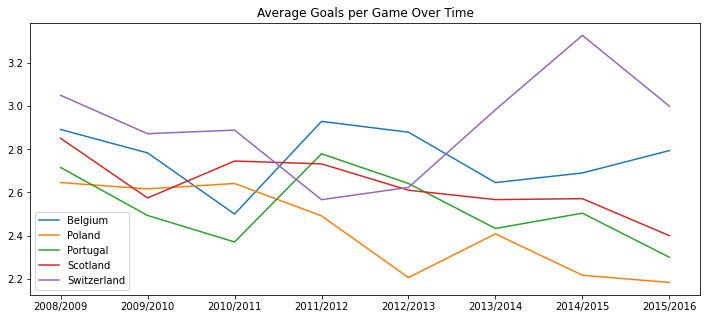

In [10]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Scotland'] = list(leages_by_season.loc[leages_by_season['country_name']=='Scotland','avg_goals'])
df.loc[:,'Poland']   = list(leages_by_season.loc[leages_by_season['country_name']=='Poland','avg_goals'])
df.loc[:,'Belgium']   = list(leages_by_season.loc[leages_by_season['country_name']=='Belgium','avg_goals'])
df.loc[:,'Portugal']   = list(leages_by_season.loc[leages_by_season['country_name']=='Portugal','avg_goals'])
df.loc[:,'Switzerland']   = list(leages_by_season.loc[leages_by_season['country_name']=='Switzerland','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

### Analytic on Player Attributes using SQL:  

SELECT FROM, JOIN, WHERE, GROUP BY, HAVING, ORDER BY, LIMIT, SUB QUERIES and FUNCTIONS

In [11]:
players_height = pd.read_sql("""SELECT CASE
                                    WHEN ROUND(height)<165 then 165
                                    WHEN ROUND(height)>195 then 195
                                    ELSE ROUND(height)
                                    END AS calc_height, 
                                    COUNT(height) AS distribution, 
                                    (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                    (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                    AVG(weight) AS avg_weight 
                                    FROM player
                                    LEFT JOIN (SELECT player_attributes.player_api_id, 
                                    avg(player_attributes.overall_rating) AS avg_overall_rating,
                                    avg(player_attributes.potential) AS avg_potential  
                                    FROM player_attributes
                                    GROUP BY player_attributes.player_api_id) 
                                    AS PA_Grouped ON player.player_api_id = PA_Grouped.player_api_id
                                    GROUP BY calc_height
                                    ORDER BY calc_height;""", connection)
players_height

C:\Users\William\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165,74,67.697248,72.791498,139.4595
1,168,118,67.714836,73.382954,144.1271
2,170,403,67.870609,73.468954,147.7990
3,173,530,66.860784,72.789302,152.8245
4,175,1188,66.624787,72.157072,156.1120
5,178,1489,66.336669,71.908461,160.6655
6,180,1388,66.562129,71.950712,165.2615
7,183,1954,66.582831,71.753990,170.1679
8,185,1278,66.976692,71.910639,174.6369
9,188,1305,67.153407,72.267793,179.2782


In [12]:
df = pd.DataFrame(players_height)

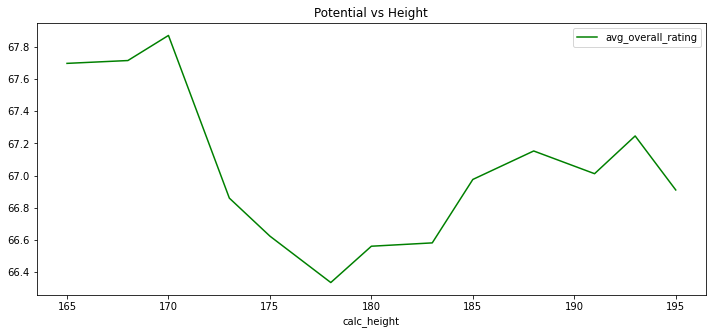

In [13]:
ax = plt.gca() 
  
# line plot for math marks
df.plot(kind = 'line',
        x = 'calc_height',
        y = 'avg_overall_rating',
        color = 'green',ax = ax, figsize=(12,5))
  
# set the title
plt.title('Potential vs Height')
  
# show the plot
plt.show()